In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
country = pd.read_csv('cd.csv')
country


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

converting the values off precentage into no.s

In [6]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

there are no null values

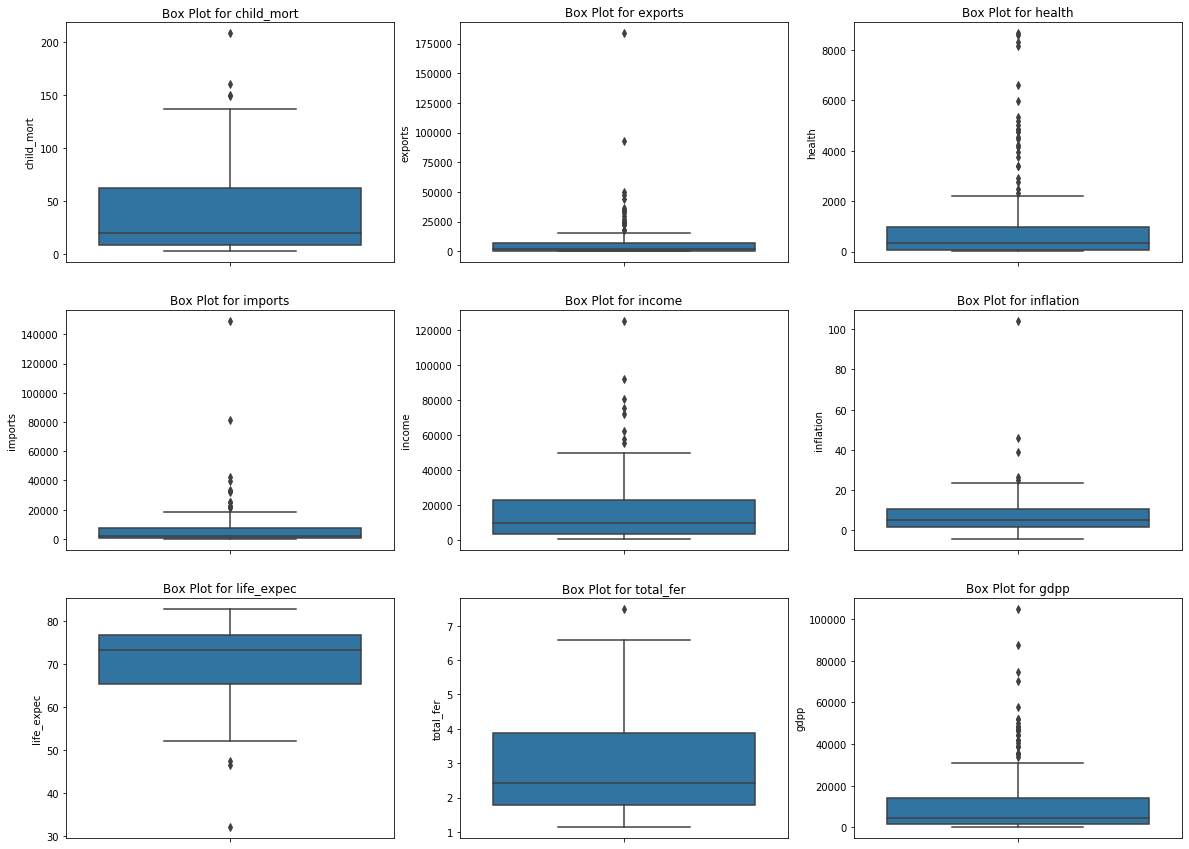

In [9]:
import seaborn as sns
cols = country.drop("country",1)

plt.figure(figsize=(20,15))
for idx,col in enumerate(cols):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(y=col, data =country)
    plt.title("Box Plot for "+ col)
    
plt.show()


there are outliers present in the dataset 

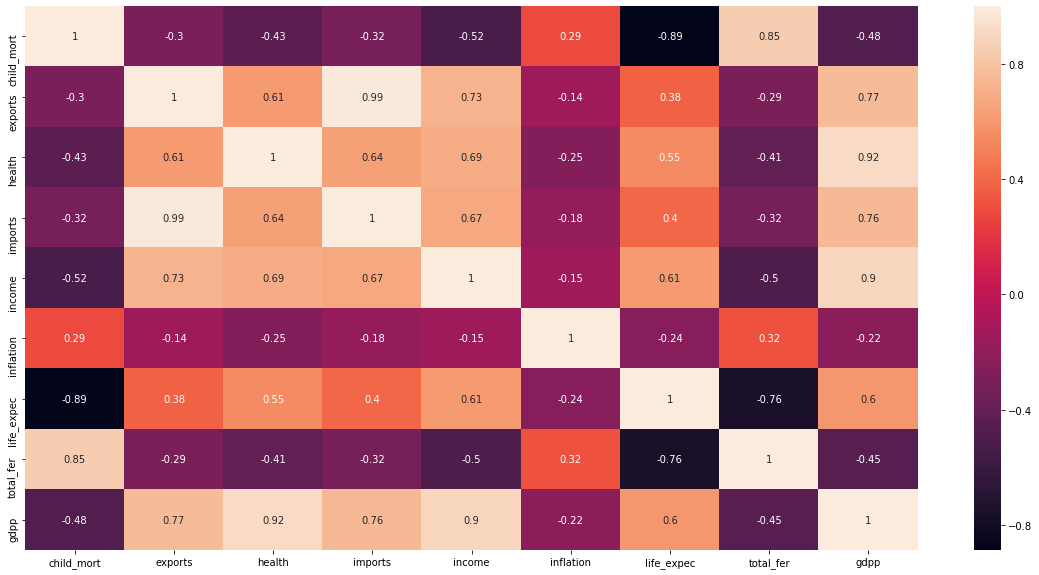

In [10]:
plt.figure(figsize = (20,10))        
sns.heatmap(country.corr(),annot = True)

Lot of variables are correlated hence its a good data set to apply PCA.

In [39]:
y= country.pop('country')

In [13]:
data = country.drop(["country"],axis = 1)
scaler = StandardScaler()
scaled_data =  scaler.fit_transform(data)

In [14]:
pca = PCA(0.90)

this retains the components which gives 90% accuracy to the model

In [15]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239]])

In [17]:
print("variance explained by PCs:",pca.explained_variance_ratio_)

variance explained by PCs: [0.58937298 0.18445169 0.09911472 0.06072278]


In [18]:
print("\ncumulative variance explained by PCs:",np.cumsum(pca.explained_variance_ratio_))


cumulative variance explained by PCs: [0.58937298 0.77382467 0.87293939 0.93366217]


top 4 PCs are explaining 93% variation present in the dataset

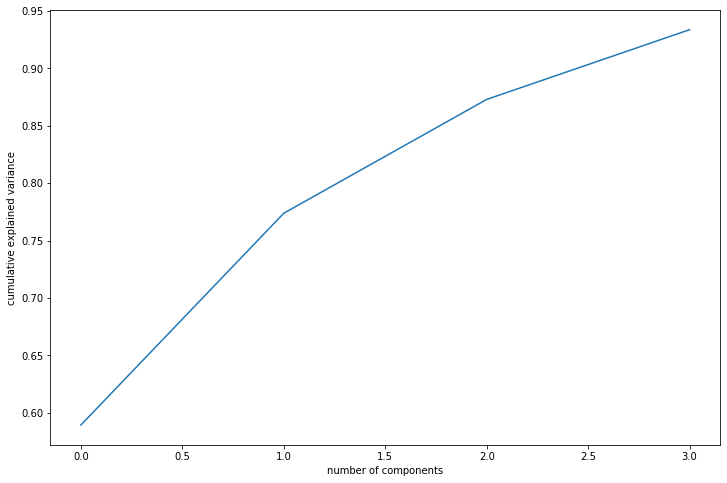

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Graph shows the same thing that we discussed above, top 3 PCs explains nearly 90% of the variation present in the dataset.So,Let's try and check the first three components now

<BarContainer object of 4 artists>

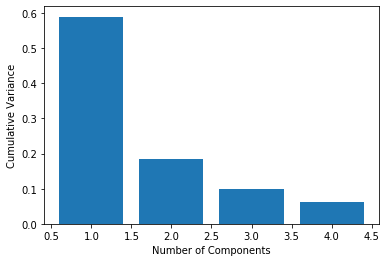

In [31]:
plt.ylabel('Cumulative Variance')
plt.xlabel('Number of Components')
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [23]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


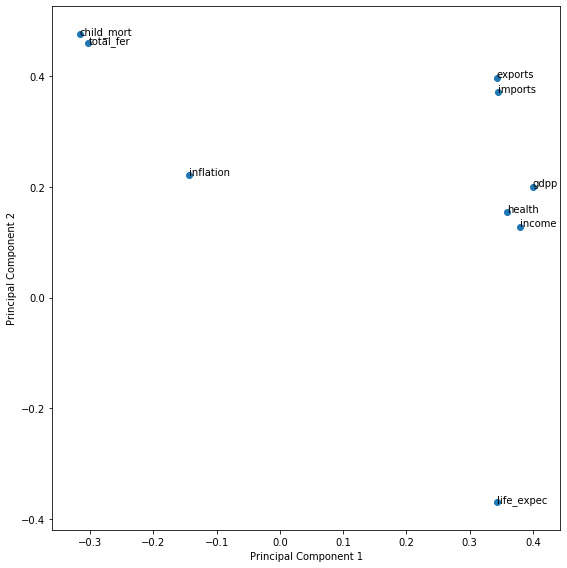

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [32]:
from sklearn.decomposition import IncrementalPCA
pc5 = PCA(n_components = 5, random_state=42)

In [35]:
df_pc5 = pc5.fit_transform(scaled_data)
df_pc5.shape


(167, 5)

In [36]:
df5 = pd.DataFrame(df_pc5, columns=['PC1','PC2','PC3','PC4','PC5'])

Making a dataframe out of it for convinience

In [40]:
df5_final = pd.concat([df5,y], axis=1)

In [41]:
df5_final

,PC1,PC2,PC3,PC4,PC5,country
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,Albania
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria
3,-2.722630,2.172332,0.600215,-0.433978,0.005433,Angola
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda
5,0.035422,-0.685251,1.468697,-0.028838,-0.103928,Argentina
6,-0.334555,-1.271889,0.190564,0.500247,-0.205703,Armenia
7,3.181525,-0.262485,-0.130870,-1.678358,-0.029334,Australia
8,3.816857,0.248363,-0.258960,-1.018163,-0.345366,Austria
9,-0.467995,-0.492682,0.609900,0.254612,0.179938,Azerbaijan


dealing with the outliers by using quartiles of 95%

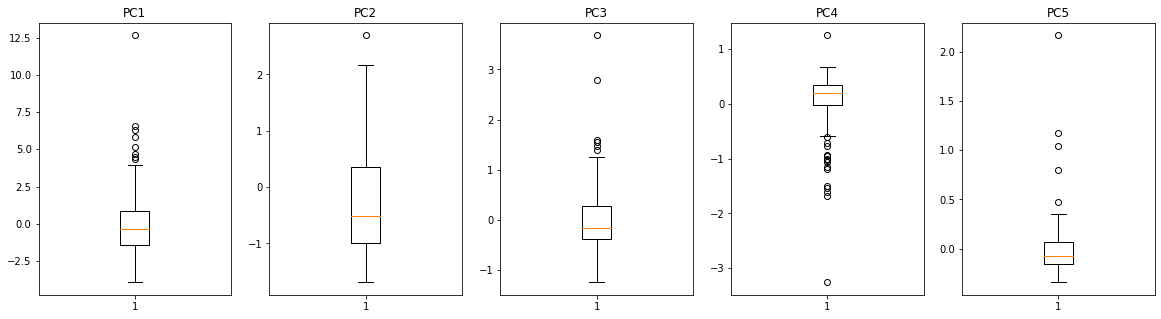

In [43]:
plt.figure(figsize=(20,5))
# For PC1
plt.subplot(1,5,1)
plt.title('PC1')
plt.boxplot(df5_final.PC1)

Q1 = df5_final.PC1.quantile(0.05)
Q3 = df5_final.PC1.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC1>=Q1) & (df5_final.PC1<=Q3)]

# For PC2
plt.subplot(1,5,2)
plt.title('PC2')
plt.boxplot(df5_final.PC2)

Q1 = df5_final.PC2.quantile(0.05)
Q3 = df5_final.PC2.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC2>=Q1) & (df5_final.PC2<=Q3)]


# For PC3
plt.subplot(1,5,3)
plt.title('PC3')
plt.boxplot(df5_final.PC3)

Q1 = df5_final.PC3.quantile(0.05)
Q3 = df5_final.PC3.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC3>=Q1) & (df5_final.PC3<=Q3)]


# For PC4
plt.subplot(1,5,4)
plt.title('PC4')
plt.boxplot(df5_final.PC4)

Q1 = df5_final.PC4.quantile(0.05)
Q3 = df5_final.PC4.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC4>=Q1) & (df5_final.PC4<=Q3)]


# For PC5
plt.subplot(1,5,5)
plt.title('PC5')
plt.boxplot(df5_final.PC5)

Q1 = df5_final.PC5.quantile(0.05)
Q3 = df5_final.PC5.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC5>=Q1) & (df5_final.PC5<=Q3)]

In [46]:
df6_final = df5_final.drop('country', axis = 1)

In [47]:
from sklearn.metrics import silhouette_score

ssd = []
for k in range(1,10):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df6_final)
    ssd.append([model.inertia_])

print(ssd)

[[265.0462697084586], [132.39858751708852], [66.27792261056419], [47.73515580616787], [40.38355155844559], [33.93621402952589], [28.874346152365348], [23.650676513125454], [20.271719579861255]]


As you can infer from the metric score after the 3 the vlaues start to decrease .So,take 3 as the cluster value


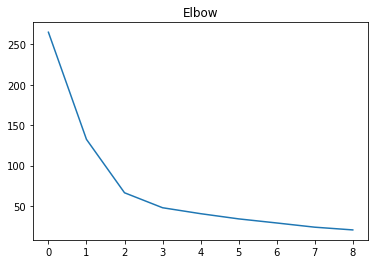

In [71]:
plt.title('Elbow')
plt.plot(ssd)

As you can infer from the graph also, the curve has a bend at 3.

In [49]:
model_clus2 = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
model_clus2.fit(df6_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [50]:

dat_km = pd.concat([df5_final.reset_index().drop('index', axis=1), pd.Series(model_clus2.labels_)], axis =1)

adding the cluster Ids to the PCs data 

In [51]:
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,country,0
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan,1
1,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria,0
2,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda,0
3,-0.334555,-1.271889,0.190564,0.500247,-0.205703,Armenia,0
4,-0.467995,-0.492682,0.609900,0.254612,0.179938,Azerbaijan,0


In [52]:
dat_km.columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'country','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan,1
1,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria,0
2,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda,0
3,-0.334555,-1.271889,0.190564,0.500247,-0.205703,Armenia,0
4,-0.467995,-0.492682,0.609900,0.254612,0.179938,Azerbaijan,0


In [53]:
dat_km['ClusterID'].value_counts()


0    51
1    28
2    16
Name: ClusterID, dtype: int64

Checking the count of observation per cluster

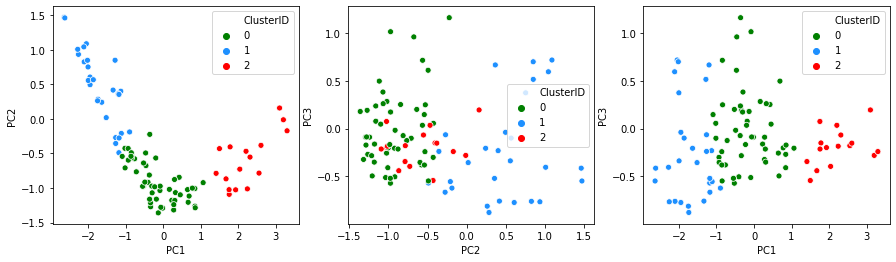

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y ='PC2', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)
plt.subplot(1,3,2)
sns.scatterplot(x='PC2', y ='PC3', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)
plt.subplot(1,3,3)
sns.scatterplot(x='PC1', y ='PC3', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)

Plot the Cluster with respect to the clusters obtained

In [63]:
dat5 = pd.merge(country, dat_km, how = 'inner', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,0.023530,1
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,-0.113275,0
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,0.072694,0
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,-0.205703,0
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,0.179938,0


Cluster Profiling:
merging the original data with the data(ClusterID)

In [64]:
dat5.shape

(95, 16)

In [65]:
dat6 = dat5[['country','child_mort', 'income','gdpp', 'PC1', 'PC2', 'ClusterID']]

In [66]:
dat6.groupby('ClusterID').count()

,country,child_mort,income,gdpp,PC1,PC2
ClusterID,,,,,,
0,51,51,51,51,51,51
1,28,28,28,28,28,28
2,16,16,16,16,16,16


In [68]:
child_mort = dat6.groupby(['ClusterID']).child_mort.mean()
income = dat6.groupby(['ClusterID']).income.mean()
gdpp = dat6.groupby(['ClusterID']).gdpp.mean()
print(child_mort)
print(income)
print(gdpp)

ClusterID
0    21.192157
1    64.910714
2     4.781250
Name: child_mort, dtype: float64
ClusterID
0    11828.039216
1     4620.357143
2    31943.750000
Name: income, dtype: float64
ClusterID
0     6382.313725
1     2199.892857
2    30606.250000
Name: gdpp, dtype: float64


In [70]:
final_df = pd.concat([child_mort, income, gdpp], axis = 1)
final_df


,child_mort,income,gdpp
ClusterID,,,
0,21.192157,11828.039216,6382.313725
1,64.910714,4620.357143,2199.892857
2,4.781250,31943.750000,30606.250000


K-Means Suggestion:
1.Countries in Cluster 1 have an average child mortality 65, 65/1000 child die before the age of 5.
2.Countries in Cluster 1 have an average gdpp of 2199 which is very low compared to clusters 0 & 2.
3.Countries in Cluster 1 have an average income of 4620 which is very low compared to clusters 0 & 2.

so,we conclude that countries in the cluster 1,are in need of immediate help and attention

In [77]:
dat6[dat6['ClusterID']==1]['country']

0               Afghanistan
11                 Botswana
14                 Cambodia
19                  Comoros
20              Congo, Rep.
28                  Eritrea
32                    Gabon
33                   Gambia
36                    Ghana
42                    India
45                     Iraq
51                    Kenya
53                      Lao
55                  Liberia
57               Madagascar
60               Mauritania
62    Micronesia, Fed. Sts.
64                  Myanmar
65                  Namibia
67                 Pakistan
75                   Rwanda
79          Solomon Islands
80             South Africa
84                    Sudan
86                 Tanzania
90             Turkmenistan
91                   Uganda
94                  Vanuatu
Name: country, dtype: object